# Download RGI glacier shapefiles and plot those that are in our RoI

In [1]:
import geopandas as gpd
import os

In [2]:
data_dir = "rgi_data"

In [3]:
!mkdir -p $data_dir
%cd $data_dir
if not os.path.exists('02_rgi60_WesternCanadaUS.zip'):
    !wget -O 02_rgi60_WesternCanadaUS.zip https://www.glims.org/RGI/rgi60_files/02_rgi60_WesternCanadaUS.zip
    !unzip 02_rgi60_WesternCanadaUS.zip
%cd ..

/mnt/working/egagli/sw/repos/sar_snow_melt_timing/shapefiles/rgi_data
/mnt/working/egagli/sw/repos/sar_snow_melt_timing/shapefiles


In [4]:
# rgi60_gdf = gpd.read_file("shapefiles/02_rgi60_WesternCanadaUS.shp")
rgi60_gdf = gpd.read_file(f"{data_dir}/02_rgi60_WesternCanadaUS.shp")
rainier_box = gpd.read_file('mt_rainier.geojson')

In [5]:
rainier_box

,geometry
0,"POLYGON ((-121.87271 46.79324, -121.64303 46.7..."


<AxesSubplot:>

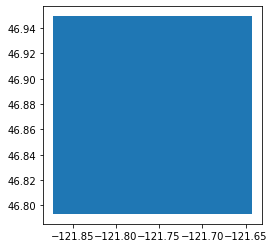

In [6]:
rainier_box.plot()

In [7]:
rainier_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
rgi60_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

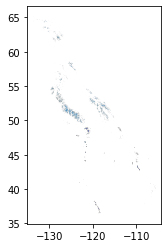

In [9]:
rgi60_gdf.plot()

In [10]:
# wa_rgi60_gdf = rgi60_gdf[rgi60_gdf.within(rainier_box)].copy()
wa_rgi60_gdf = rgi60_gdf[rgi60_gdf.intersects(rainier_box.loc[0, 'geometry'])]

<AxesSubplot:>

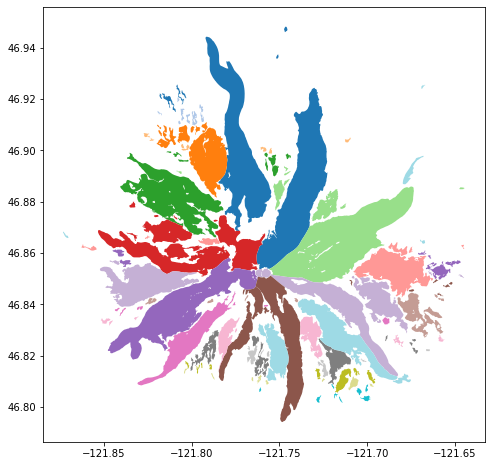

In [11]:
wa_rgi60_gdf.plot(figsize=(8,8),cmap='tab20')

In [12]:
wa_rgi60_gdf

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
14254,RGI60-02.14255,G238254E46947N,19709999,19949999,-121.74638,46.94710,2,4,0.023,1892,...,8,206,0,0,0,0,0,9,WA,"POLYGON ((-121.74699 46.94762, -121.74683 46.9..."
14255,RGI60-02.14256,G238227E46901N,19709999,19949999,-121.77327,46.90137,2,4,8.004,1085,...,354,9168,0,0,0,0,0,9,Carbon Glacier WA,"POLYGON ((-121.79189 46.94312, -121.79201 46.9..."
14256,RGI60-02.14257,G238249E46936N,19709999,19949999,-121.75111,46.93640,2,4,0.012,1926,...,19,146,0,0,0,0,0,9,WA,"POLYGON ((-121.75121 46.93703, -121.75118 46.9..."
14257,RGI60-02.14258,G238193E46922N,19709999,19949999,-121.80675,46.92189,2,4,0.047,1868,...,22,457,0,0,0,0,0,9,WA,"POLYGON ((-121.80852 46.92400, -121.80852 46.9..."
14258,RGI60-02.14259,G238261E46885N,19709999,19949999,-121.73878,46.88511,2,4,9.195,1437,...,21,8445,0,0,0,0,0,9,Winthrop Glacier WA,"POLYGON ((-121.73286 46.87035, -121.73377 46.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14409,RGI60-02.14410,G238320E46811N,19709999,-9999999,-121.67981,46.81073,2,4,0.139,1520,...,62,717,0,0,0,0,0,9,WA,"POLYGON ((-121.68521 46.81029, -121.68502 46.8..."
14410,RGI60-02.14411,G238332E46864N,19709999,-9999999,-121.66821,46.86438,2,4,0.020,1821,...,36,135,0,0,0,0,0,9,WA,"POLYGON ((-121.66827 46.86483, -121.66818 46.8..."
18816,RGI60-02.18817,G238285E46833N,19709999,19949999,-121.71492,46.83292,2,4,3.567,1617,...,113,5602,0,0,0,0,0,9,Cowlitz Glacier WA,"POLYGON ((-121.70470 46.82827, -121.70367 46.8..."
18817,RGI60-02.18818,G238252E46825N,19709999,19949999,-121.74768,46.82481,2,4,1.551,2081,...,140,2046,0,0,0,0,0,9,Wilson Glacier WA,"POLYGON ((-121.75743 46.82628, -121.75693 46.8..."


In [13]:
named_glaciers = wa_rgi60_gdf[wa_rgi60_gdf['Name'] != 'WA']

In [14]:
named_glaciers.columns

Index(['RGIId', 'GLIMSId', 'BgnDate', 'EndDate', 'CenLon', 'CenLat',
       'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope',
       'Aspect', 'Lmax', 'Status', 'Connect', 'Form', 'TermType', 'Surging',
       'Linkages', 'Name', 'geometry'],
      dtype='object')

In [15]:
named_glaciers.to_file("rainier_glaciers.geojson", driver='GeoJSON')

In [16]:
named_glaciers[named_glaciers['Name'] == 'Carbon Glacier WA']

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
14255,RGI60-02.14256,G238227E46901N,19709999,19949999,-121.77327,46.90137,2,4,8.004,1085,...,354,9168,0,0,0,0,0,9,Carbon Glacier WA,"POLYGON ((-121.79189 46.94312, -121.79201 46.9..."


<AxesSubplot:>

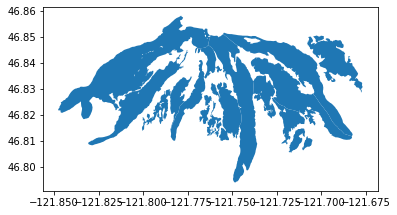

In [17]:
south_facing_glaciers = named_glaciers[(named_glaciers['Aspect'] > 90) & (named_glaciers['Aspect'] < 270)]
south_facing_glaciers.plot()

In [18]:
rainier_box.columns

Index(['geometry'], dtype='object')

In [19]:
rgi60_gdf.columns

Index(['RGIId', 'GLIMSId', 'BgnDate', 'EndDate', 'CenLon', 'CenLat',
       'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope',
       'Aspect', 'Lmax', 'Status', 'Connect', 'Form', 'TermType', 'Surging',
       'Linkages', 'Name', 'geometry'],
      dtype='object')

<AxesSubplot:>

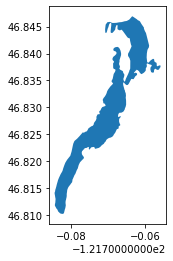

In [20]:
wa_rgi60_gdf[wa_rgi60_gdf['Name'] == 'Kautz Glacier WA'].plot()

In [21]:
import matplotlib.pyplot as plt

In [22]:
glacier = wa_rgi60_gdf.iloc[[0]]
glacier['Name'].item()

'WA'

## Plot all named glaciers so we can see their shapes in detail

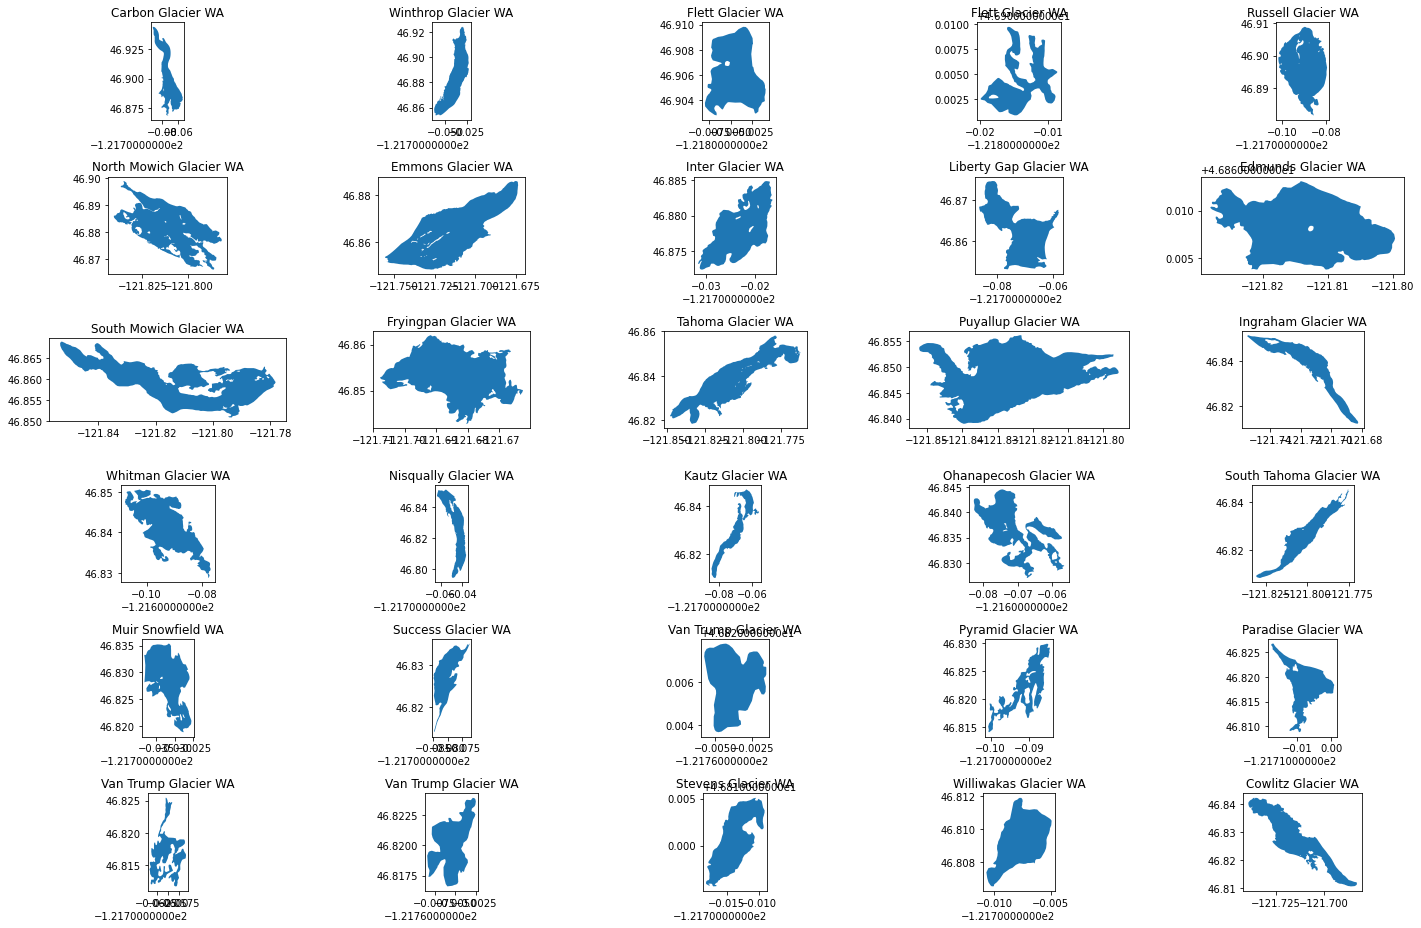

In [23]:
cols = 5
rows = len(named_glaciers) // cols 

f,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,13))
k=0
for j in range(rows):
    for i in range(cols):
        glacier = named_glaciers.iloc[[k]]
        glacier.plot(ax=ax[j,i])
        title = glacier['Name'].item()
        ax[j,i].set_title(title)
        k = k + 1
plt.tight_layout()

In [24]:
#sorted(named_glaciers['Name'])

In [25]:
#sorted(set(named_glaciers['Name'])) # Excluding "WA"